In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
from io import StringIO
from sklearn.metrics import mean_squared_error, r2_score
import time
import urllib.request
import json
from scipy.optimize import curve_fit
import datetime

In [2]:
df2017=pd.read_csv('2017HeatDemand.csv')
df2016=pd.read_csv('2016HeatDemand.csv')
df2015=pd.read_csv('2015HeatDemand.csv')

In [3]:
df2015 = df2015[['Date/Time','Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)',
        'TZ_001_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_002_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_003_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_004_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_005_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_006_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_007_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_008_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_009_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_010_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_011_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_012_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_013_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_014_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_015_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_016_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_017_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP01:TZX018_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP01:TZX019_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP01:TZX020_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP01:TZX021_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP01:TZX022_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX023_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX024_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX025_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX026_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX027_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX028_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX029_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX030_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX031_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX032_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX033_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX034_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX035_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX036_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX037_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX038_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX039_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX040_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX041_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX042_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX043_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX044_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX045_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX046_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX047_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX048_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX049_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX050_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX051_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX052_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX053_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX054_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX055_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP00:TZX056_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP00:TZX057_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP00:TZX058_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP00:TZX059_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP01:TZX060_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP01:TZX061_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP01:TZX062_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP01:TZX063_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP02:TZX064_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP02:TZX065_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP02:TZX066_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP02:TZX067_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP03:TZX068_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP03:TZX069_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP03:TZX070_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP03:TZX071_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP04:TZX072_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP04:TZX073_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP04:TZX074_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP04:TZX075_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP00:TZX076_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP00:TZX077_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP00:TZX078_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP00:TZX079_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP01:TZX080_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP01:TZX081_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP01:TZX082_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP01:TZX083_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP02:TZX084_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP02:TZX085_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP02:TZX086_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP02:TZX087_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP03:TZX088_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP03:TZX089_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP03:TZX090_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP03:TZX091_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP04:TZX092_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP04:TZX093_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP04:TZX094_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP04:TZX095_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'DH:District Heating Rate [W](TimeStep:ON)']]
df2016 = df2016[['Date/Time','Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)',
        'TZ_001_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_002_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_003_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_004_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_005_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_006_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_007_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_008_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_009_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_010_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_011_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_012_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_013_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_014_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_015_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_016_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_017_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP01:TZX018_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP01:TZX019_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP01:TZX020_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP01:TZX021_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP01:TZX022_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX023_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX024_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX025_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX026_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX027_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX028_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX029_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX030_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX031_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX032_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX033_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX034_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX035_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX036_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX037_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX038_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX039_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX040_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX041_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX042_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX043_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX044_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX045_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX046_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX047_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX048_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX049_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX050_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX051_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX052_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX053_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX054_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX055_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP00:TZX056_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP00:TZX057_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP00:TZX058_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP00:TZX059_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP01:TZX060_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP01:TZX061_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP01:TZX062_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP01:TZX063_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP02:TZX064_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP02:TZX065_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP02:TZX066_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP02:TZX067_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP03:TZX068_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP03:TZX069_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP03:TZX070_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP03:TZX071_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP04:TZX072_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP04:TZX073_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP04:TZX074_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP04:TZX075_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP00:TZX076_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP00:TZX077_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP00:TZX078_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP00:TZX079_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP01:TZX080_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP01:TZX081_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP01:TZX082_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP01:TZX083_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP02:TZX084_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP02:TZX085_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP02:TZX086_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP02:TZX087_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP03:TZX088_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP03:TZX089_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP03:TZX090_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP03:TZX091_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP04:TZX092_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP04:TZX093_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP04:TZX094_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP04:TZX095_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'DH:District Heating Rate [W](TimeStep:ON)']]
df2017 = df2017[['Date/Time','Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)',
        'TZ_001_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_002_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_003_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_004_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_005_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_006_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_007_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_008_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_009_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_010_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_011_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_012_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_013_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_014_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_015_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_016_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'TZ_017_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP01:TZX018_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP01:TZX019_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP01:TZX020_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP01:TZX021_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP01:TZX022_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX023_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX024_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX025_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX026_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX027_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX028_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX029_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX030_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX031_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX032_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP02:TZX033_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX034_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX035_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX036_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX037_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX038_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX039_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX040_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX041_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX042_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX043_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP03:TZX044_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX045_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX046_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX047_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX048_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX049_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX050_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX051_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX052_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX053_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX054_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B1XP04:TZX055_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP00:TZX056_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP00:TZX057_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP00:TZX058_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP00:TZX059_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP01:TZX060_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP01:TZX061_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP01:TZX062_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP01:TZX063_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP02:TZX064_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP02:TZX065_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP02:TZX066_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP02:TZX067_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP03:TZX068_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP03:TZX069_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP03:TZX070_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP03:TZX071_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP04:TZX072_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP04:TZX073_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP04:TZX074_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B2XP04:TZX075_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP00:TZX076_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP00:TZX077_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP00:TZX078_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP00:TZX079_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP01:TZX080_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP01:TZX081_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP01:TZX082_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP01:TZX083_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP02:TZX084_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP02:TZX085_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP02:TZX086_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP02:TZX087_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP03:TZX088_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP03:TZX089_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP03:TZX090_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP03:TZX091_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP04:TZX092_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP04:TZX093_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP04:TZX094_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'B3XP04:TZX095_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)',
          'DH:District Heating Rate [W](TimeStep:ON)']]

In [4]:
df1 = df2015.append(df2016, ignore_index=True)
df1 = df1.append(df2017,ignore_index=True)
df1 = df1.append(df2017,ignore_index=True)

In [5]:
df1 = df1.rename(columns={'Date/Time' : 'DateTime','Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)':'Outdoor_Temperature',
        'TZ_001_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home1',
          'TZ_002_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home2',
          'TZ_003_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home3',
          'TZ_004_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home4',
          'TZ_005_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home5',
          'TZ_006_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home6',
          'TZ_007_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home7',
          'TZ_008_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home8',
          'TZ_009_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home9',
          'TZ_010_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home10',
          'TZ_011_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home11',
          'TZ_012_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home12',
          'TZ_013_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home13',
          'TZ_014_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home14',
          'TZ_015_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home15',
          'TZ_016_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home16',
          'TZ_017_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home17',
          'B1XP01:TZX018_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home18',
          'B1XP01:TZX019_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home19',
          'B1XP01:TZX020_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home20',
          'B1XP01:TZX021_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home21',
          'B1XP01:TZX022_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home22',
          'B1XP02:TZX023_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home23',
          'B1XP02:TZX024_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home24',
          'B1XP02:TZX025_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home25',
          'B1XP02:TZX026_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home26',
          'B1XP02:TZX027_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home27',
          'B1XP02:TZX028_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home28',
          'B1XP02:TZX029_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home29',
          'B1XP02:TZX030_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home30',
          'B1XP02:TZX031_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home31',
          'B1XP02:TZX032_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home32',
          'B1XP02:TZX033_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home33',
          'B1XP03:TZX034_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home34',
          'B1XP03:TZX035_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home35',
          'B1XP03:TZX036_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home36',
          'B1XP03:TZX037_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home37',
          'B1XP03:TZX038_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home38',
          'B1XP03:TZX039_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home39',
          'B1XP03:TZX040_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home40',
          'B1XP03:TZX041_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home41',
          'B1XP03:TZX042_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home42',
          'B1XP03:TZX043_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home43',
          'B1XP03:TZX044_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home44',
          'B1XP04:TZX045_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home45',
          'B1XP04:TZX046_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home46',
          'B1XP04:TZX047_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home47',
          'B1XP04:TZX048_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home48',
          'B1XP04:TZX049_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home49',
          'B1XP04:TZX050_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home50',
          'B1XP04:TZX051_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home51',
          'B1XP04:TZX052_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home52',
          'B1XP04:TZX053_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home53',
          'B1XP04:TZX054_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home54',
          'B1XP04:TZX055_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home55',
          'B2XP00:TZX056_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home56',
          'B2XP00:TZX057_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home57',
          'B2XP00:TZX058_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home58',
          'B2XP00:TZX059_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home59',
          'B2XP01:TZX060_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home60',
          'B2XP01:TZX061_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home61',
          'B2XP01:TZX062_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home62',
          'B2XP01:TZX063_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home63',
          'B2XP02:TZX064_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home64',
          'B2XP02:TZX065_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home65',
          'B2XP02:TZX066_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home66',
          'B2XP02:TZX067_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home67',
          'B2XP03:TZX068_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home68',
          'B2XP03:TZX069_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home69',
          'B2XP03:TZX070_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home70',
          'B2XP03:TZX071_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home71',
          'B2XP04:TZX072_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home72',
          'B2XP04:TZX073_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home73',
          'B2XP04:TZX074_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home74',
          'B2XP04:TZX075_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home75',
          'B3XP00:TZX076_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home76',
          'B3XP00:TZX077_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home77',
          'B3XP00:TZX078_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home78',
          'B3XP00:TZX079_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home79',
          'B3XP01:TZX080_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home80',
          'B3XP01:TZX081_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home81',
          'B3XP01:TZX082_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home82',
          'B3XP01:TZX083_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home83',
          'B3XP02:TZX084_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home84',
          'B3XP02:TZX085_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home85',
          'B3XP02:TZX086_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home86',
          'B3XP02:TZX087_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home87',
          'B3XP03:TZX088_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home88',
          'B3XP03:TZX089_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home89',
          'B3XP03:TZX090_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home90',
          'B3XP03:TZX091_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home91',
          'B3XP04:TZX092_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home92',
          'B3XP04:TZX093_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home93',
          'B3XP04:TZX094_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home94',
          'B3XP04:TZX095_RADIATOR:Baseboard Total Heating Rate [W](TimeStep:ON)':'DH_Home95',
          'DH:District Heating Rate [W](TimeStep:ON)':'DH_Heating_Rate'})

In [6]:
for i in df1.columns:
    if (i == 'DateTime' or i == 'Outdoor_Temperature' ):
        print (i)
    else:
        df1[i] = (df1[i]/1000).round(2)
df = pd.DataFrame(columns=['month','Day','Hour','Minute'])


DateTime
Outdoor_Temperature


In [7]:
df1.head(25)

,DateTime,Outdoor_Temperature,DH_Home1,DH_Home2,DH_Home3,DH_Home4,DH_Home5,DH_Home6,DH_Home7,DH_Home8,...,DH_Home87,DH_Home88,DH_Home89,DH_Home90,DH_Home91,DH_Home92,DH_Home93,DH_Home94,DH_Home95,DH_Heating_Rate
0,01/01 00:15:00,7.2725,2.02,3.01,3.06,2.87,1.89,2.43,2.51,2.90,...,2.53,3.01,3.62,2.51,2.53,4.17,4.94,3.53,3.57,556.01
1,01/01 00:30:00,6.0650,2.23,2.98,3.03,3.16,2.08,2.68,2.49,3.19,...,2.79,3.33,3.99,2.66,2.79,2.74,2.40,1.78,2.47,526.69
2,01/01 00:45:00,4.8575,2.33,2.63,2.67,3.30,2.18,2.63,2.30,3.14,...,2.93,3.48,3.31,2.31,2.92,2.71,2.54,1.93,2.35,406.05
3,01/01 01:00:00,3.6500,2.36,2.49,2.53,2.95,2.20,2.29,2.09,2.97,...,2.96,3.52,3.38,2.60,2.95,3.40,2.87,2.13,2.45,307.21
4,01/01 01:15:00,3.8375,2.10,2.08,2.12,1.99,1.34,1.70,2.10,2.01,...,1.76,2.50,2.47,1.54,1.76,2.09,2.41,1.80,2.45,249.99
5,01/01 01:30:00,4.0250,1.70,2.08,2.12,2.39,1.96,2.04,1.54,2.41,...,2.61,2.50,2.47,2.10,2.61,2.82,2.87,1.80,2.16,218.39
6,01/01 01:45:00,4.2125,2.10,2.09,2.12,2.39,1.60,1.71,1.75,2.01,...,2.12,2.50,2.98,1.76,1.77,2.09,1.91,2.14,2.45,222.97
7,01/01 02:00:00,4.4000,1.70,2.08,2.12,2.38,1.59,2.04,1.76,2.42,...,2.11,3.10,2.18,2.10,2.61,2.82,2.87,1.43,1.82,221.36
8,01/01 02:15:00,4.5875,2.10,2.09,2.12,2.39,1.60,1.70,1.76,2.01,...,2.11,2.08,2.97,1.54,1.76,2.48,2.42,2.13,2.45,222.02
9,01/01 02:30:00,4.7750,1.70,1.83,2.12,1.99,1.59,2.04,1.76,2.42,...,2.12,3.10,2.18,2.10,2.39,2.48,2.17,1.80,2.45,222.98


In [8]:
for x in df1['DateTime']:
    m = x[1]+x[2]
    d = x[4]+x[5]
    h = x[8]+x[9]
    mi = x[11]+x[12]
    df = df.append({'month': m,'Day': d,'Hour':h,'Minute':m}, ignore_index=True)

In [9]:
df = df.astype(int)
df1 = df1.join(df)

In [10]:
df1 = df1[(df1['DH_Heating_Rate'] <= 300)]
df1.Outdoor_Temperature = df1['Outdoor_Temperature'].round(2)

0.8190707644067312


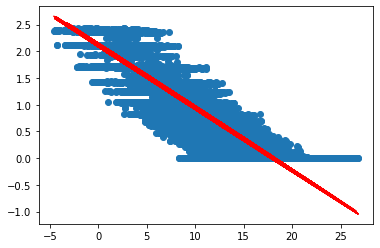

0.8157653133006195


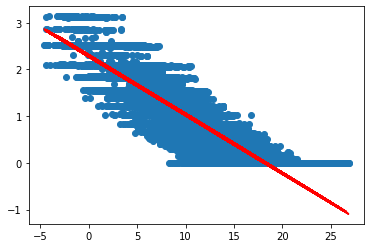

0.8182527409534561


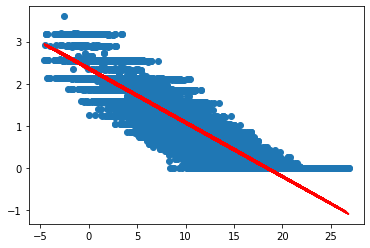

0.810940726135083


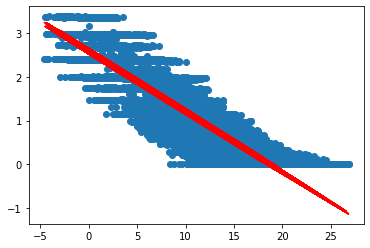

0.8550247675806502


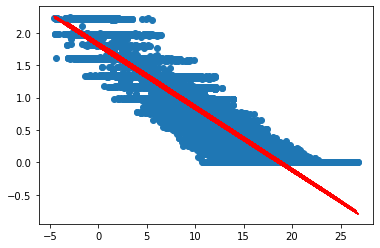

0.8398102675684838


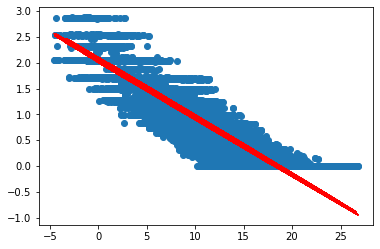

0.8450549121091429


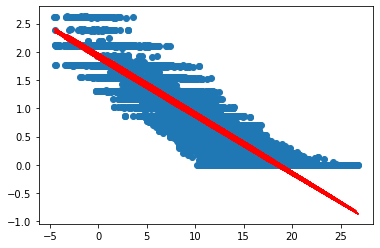

0.8250072920707687


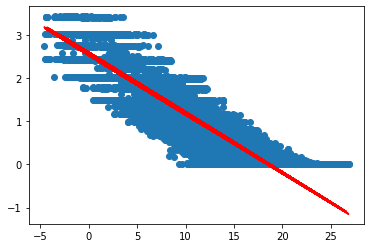

0.8084191949993214


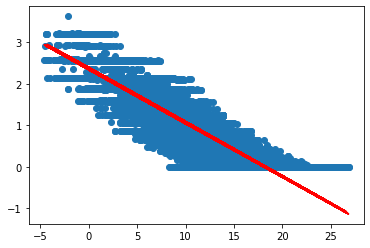

0.8026366139240827


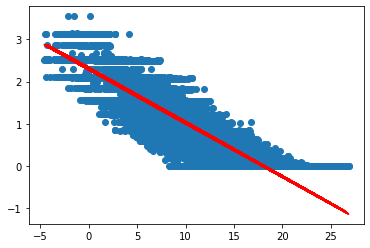

0.8013823380231868


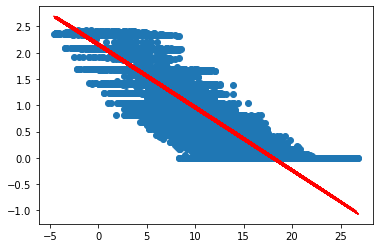

0.8092906225891947


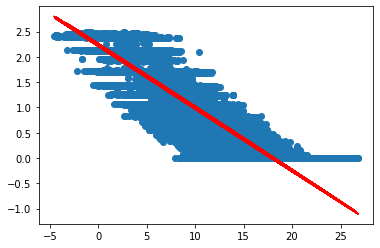

0.8135270917760383


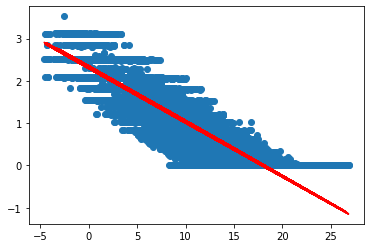

0.8156837650895107


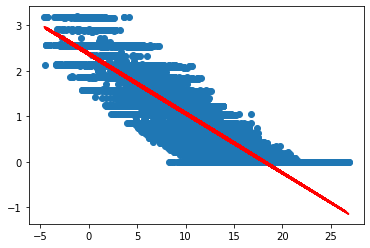

0.8017029649797207


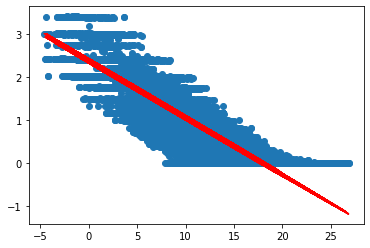

0.8131768587512914


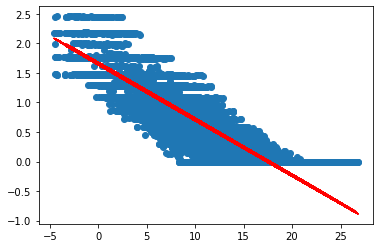

0.828258963294511


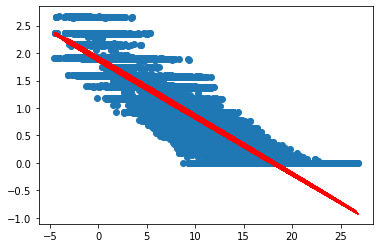

0.8286810756105868


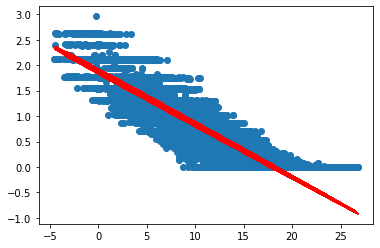

0.8203038504134621


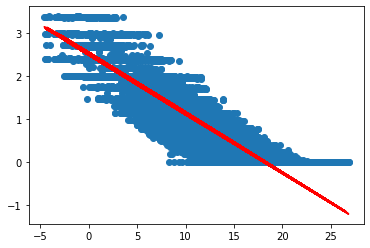

0.8037487174434308


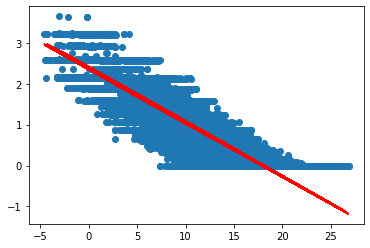

0.7956593718454008


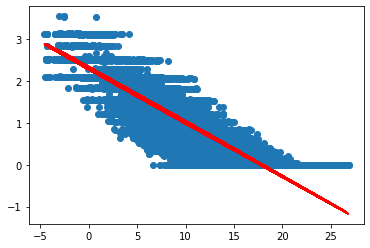

0.7933714425687317


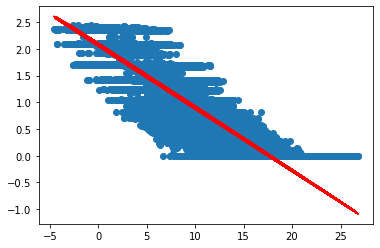

0.8001915511003922


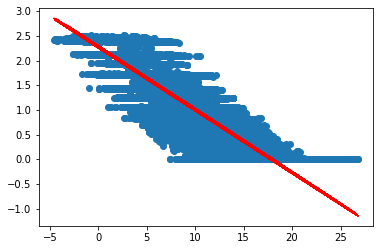

0.8105971010696451


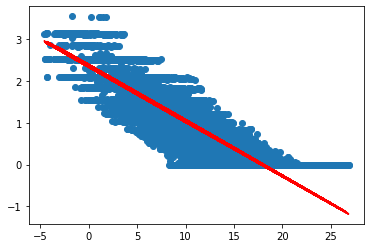

0.8138737938084919


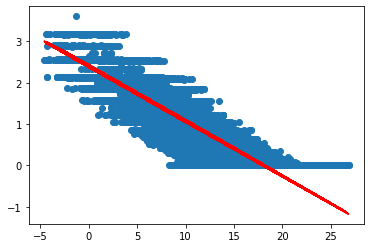

0.8079260162002321


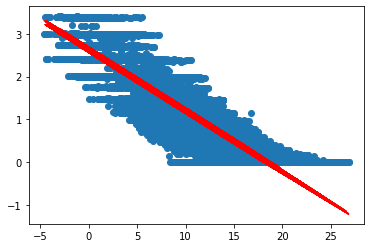

0.8176215873322799


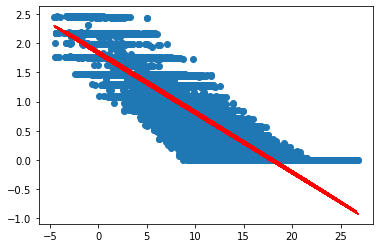

0.8243457660118001


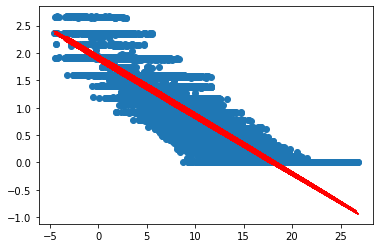

0.8256736649802212


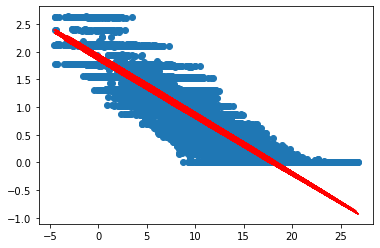

0.8205947260246857


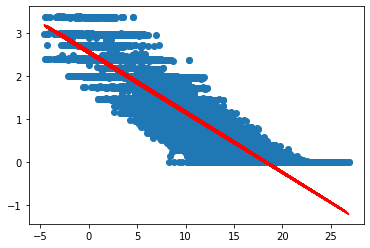

0.7988728238032665


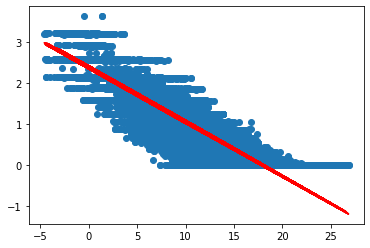

0.7891669958311807


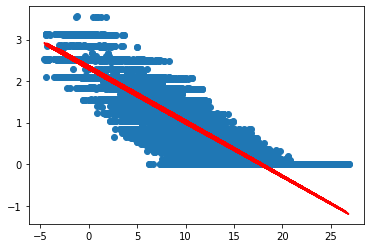

0.7888209844895614


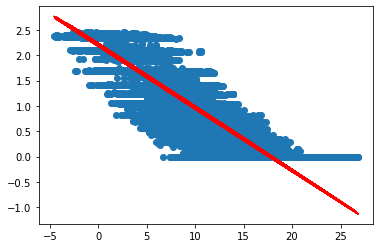

0.8014373338843631


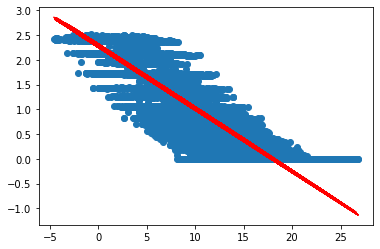

0.8059464462266331


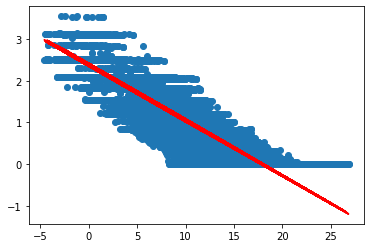

0.8094561993711775


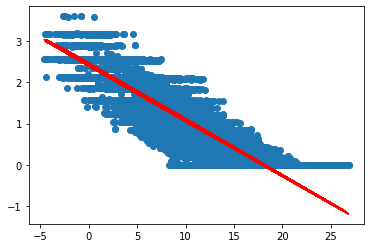

0.8087586665373842


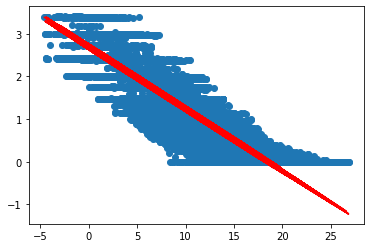

0.8131212364580532


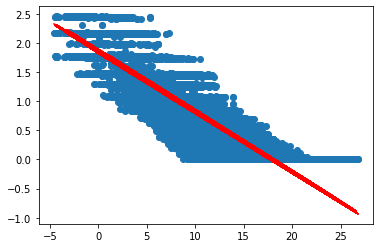

0.8196644274648592


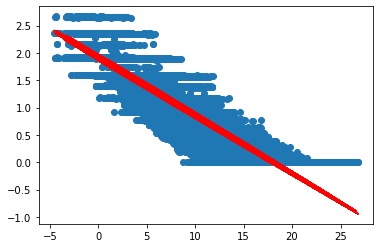

0.8212606734772407


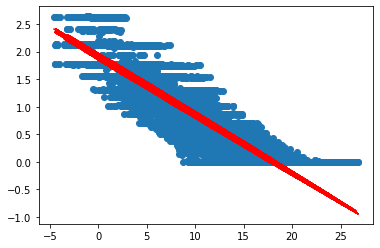

0.8211947076780665


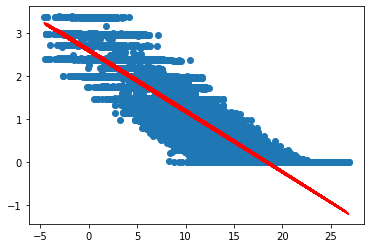

0.7941013436470723


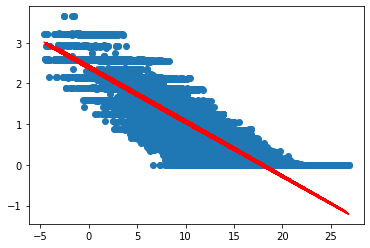

0.7853677127750502


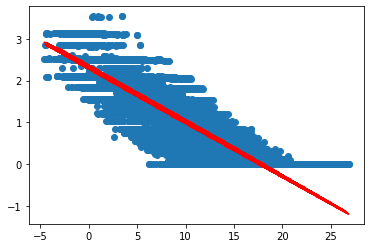

0.7816698724604287


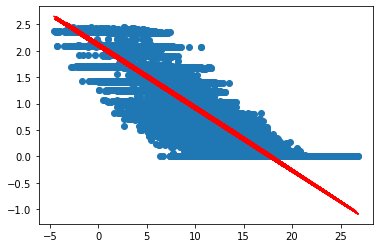

0.8187280543634141


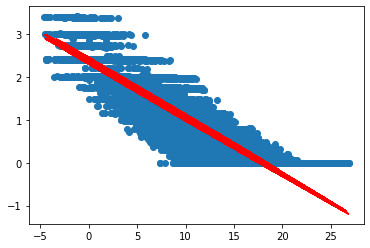

0.8243654285094923


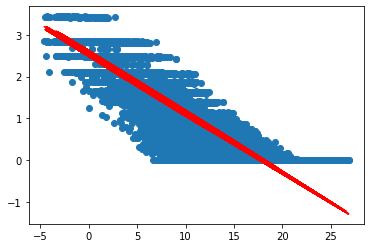

0.827866641739808


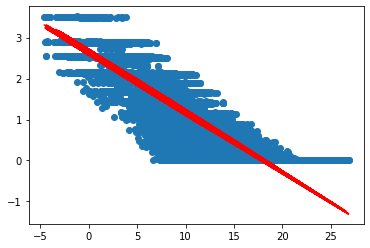

0.8284553517019412


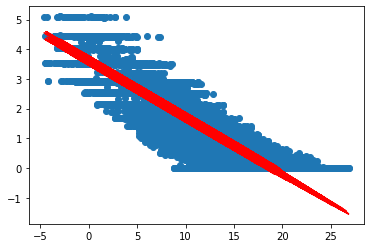

0.8244674482384049


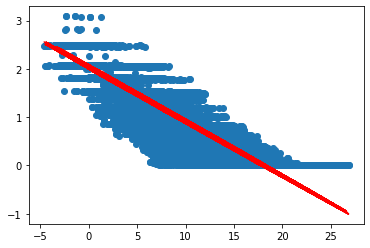

0.8329120490434693


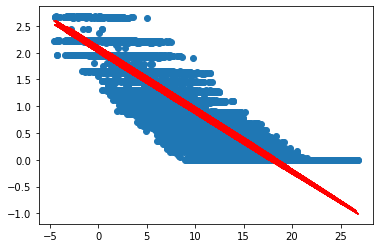

0.8363464605521473


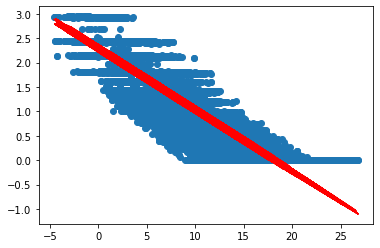

0.8431113951083363


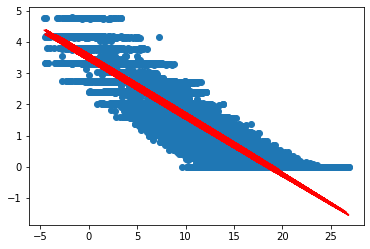

0.8150412215416736


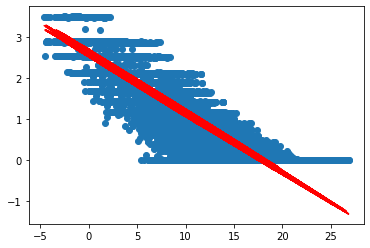

0.8054370449637014


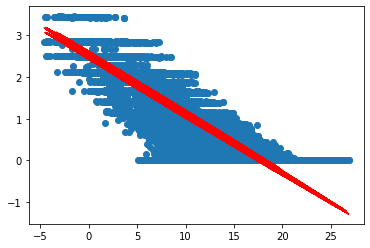

0.8085673599213642


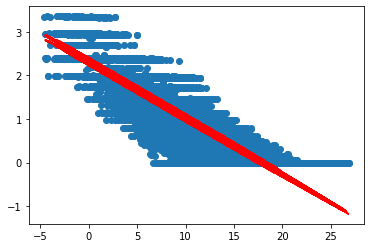

0.7684834711309111


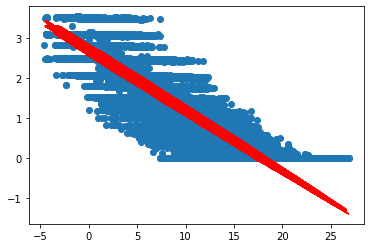

0.7827563608424964


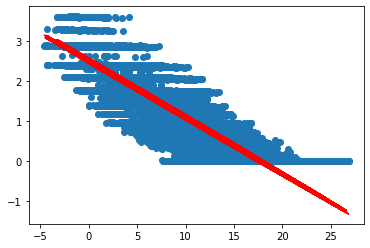

0.8158892110000409


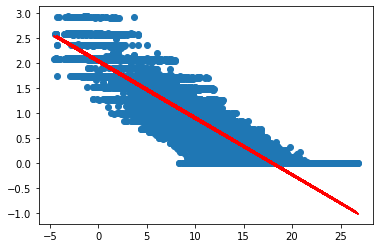

0.811410831987819


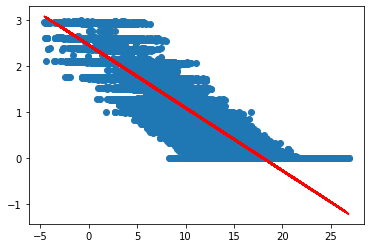

0.7693806980964762


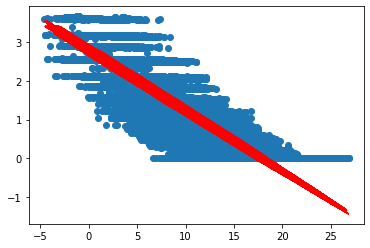

0.7798789457585384


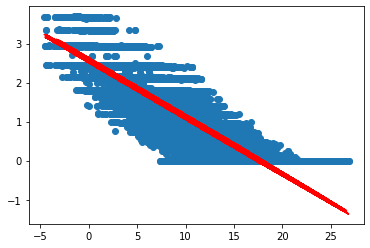

0.8141786662982877


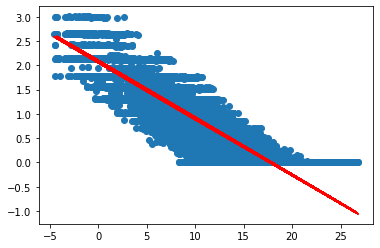

0.8160329094377593


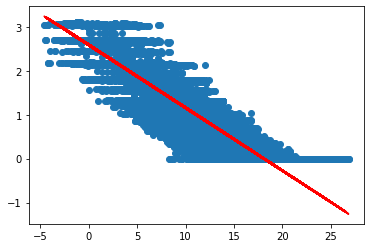

0.7733253617850382


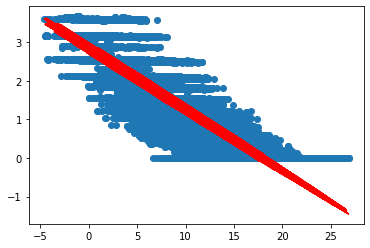

0.7817392879304907


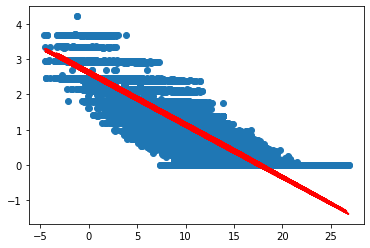

0.8124387500614016


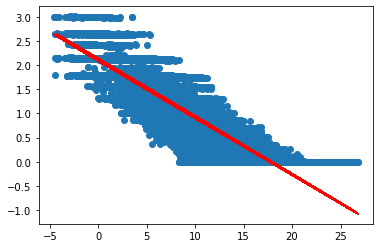

0.8208830991369741


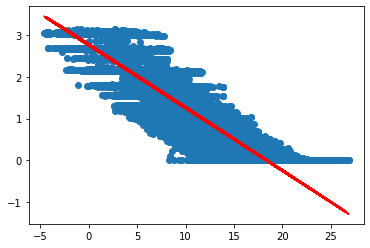

0.7760871131566764


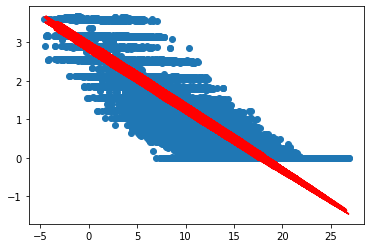

0.7829073992424124


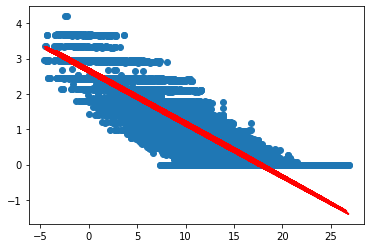

0.8085566688764946


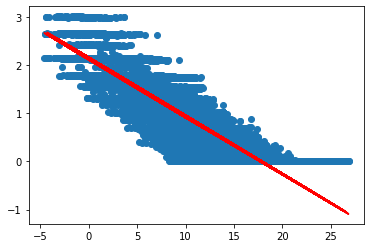

0.8194062126095889


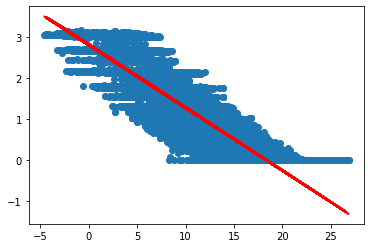

0.7980621327232738


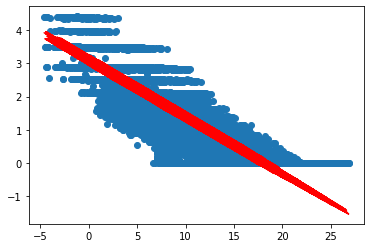

0.8000231929741572


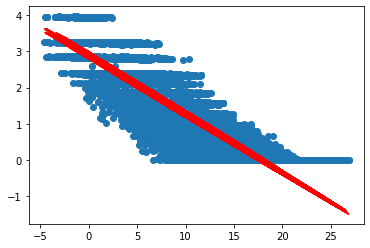

0.8251163266266232


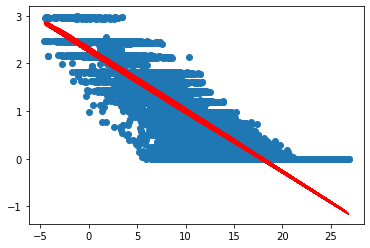

0.8301512649225613


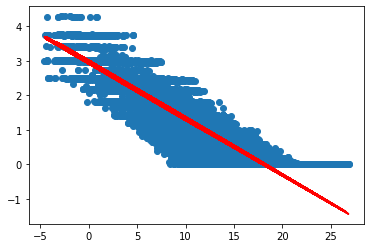

0.7871436315460096


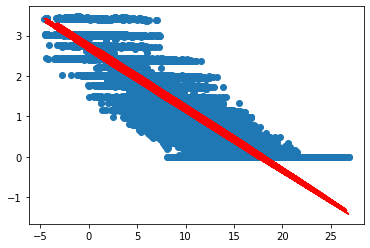

0.775774394679874


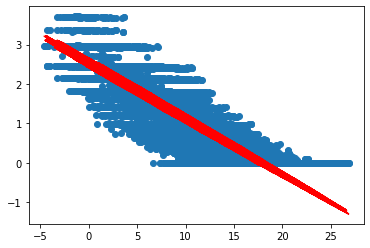

0.7979736480620223


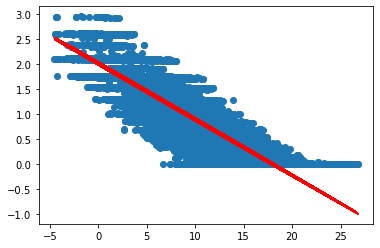

0.801153959210847


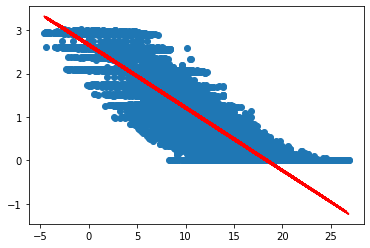

0.7850675952015992


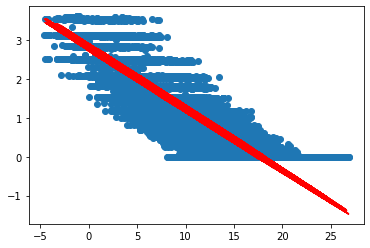

0.7703230189985335


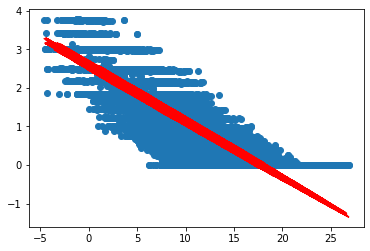

0.7897086272257436


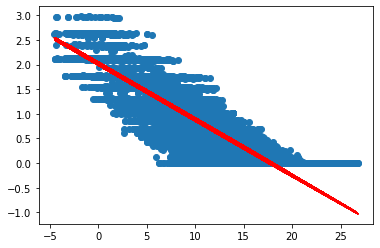

0.7950717253485884


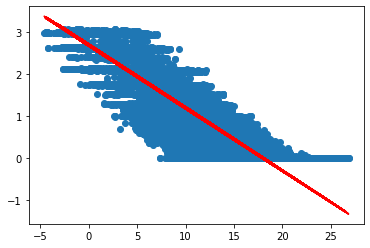

0.7882851169309617


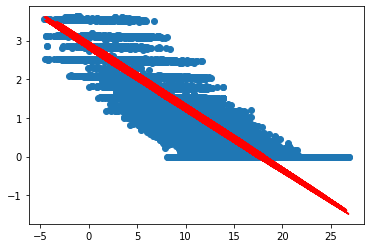

0.7693008024468578


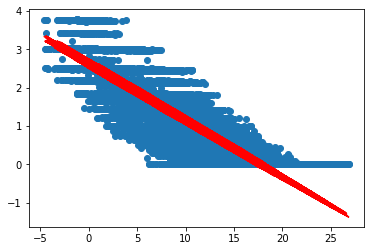

0.7846023237266844


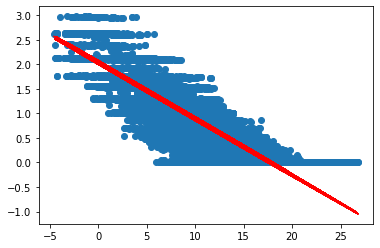

0.7926162443984498


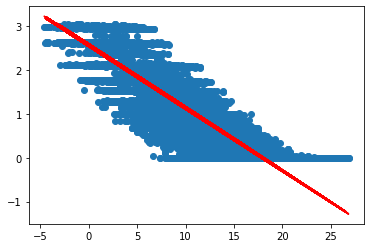

0.7912367989733189


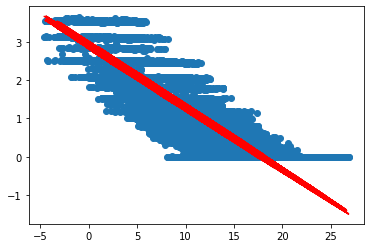

0.770427442904327


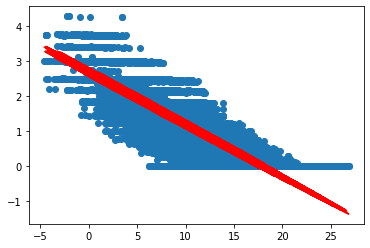

0.7799281076462192


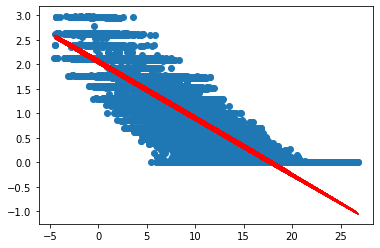

0.7893493033592638


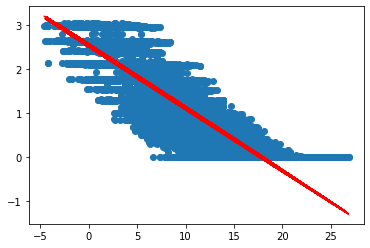

0.8069216814149305


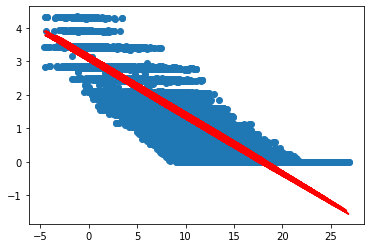

0.7915275018898879


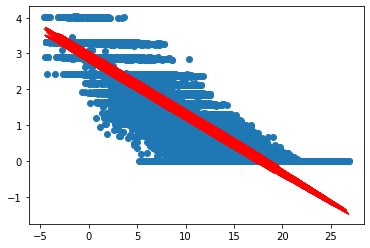

0.8021131445656353


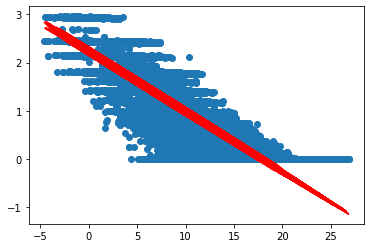

0.8211249496757242


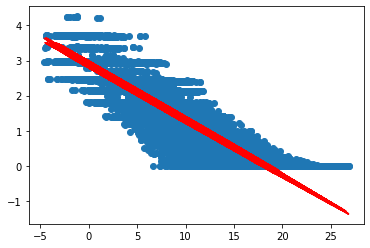

0.8202548294157106


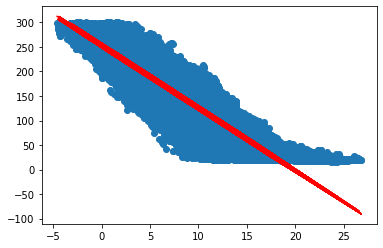

In [11]:
for i in df1.columns:
    if (i == 'DateTime' or i == 'Outdoor_Temperature' or i == 'Hour' or i == 'month' or i == 'Day' or i == 'Minute'):
        i
    else:
            X = df1[['Outdoor_Temperature','Hour','month','Day']]
            y = df1[i].round(2)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
            model = LinearRegression().fit(X_train, y_train)
            print(model.score(X_train,y_train))
            predict = model.predict(X_test)
            plt.scatter(X_test['Outdoor_Temperature'],y_test)
            plt.plot(X_test['Outdoor_Temperature'],predict,'r')
            plt.show()
        

In [12]:
f = urllib.request.urlopen('http://dataservice.accuweather.com/currentconditions'+
                           '/v1/330088/historical/24?apikey=cJO52cgVK2bIz3A4dPK0rfjQEBuqGVk3')
                           
response = json.loads(f.read())
weatherforecast = pd.DataFrame(columns=['Temp','month','Day','Hour'])
for i in range(24):
    temp=response[i]['Temperature']['Metric']['Value']
    Dt = datetime.datetime.strptime(response[i]['LocalObservationDateTime'], '%Y-%m-%dT%H:%M:%S+01:00')
    weatherforecast = weatherforecast.append({'Temp':temp,'Hour':Dt.hour,'month': Dt.month,'Day': Dt.day}, 
                                             ignore_index=True)
weatherforecast = weatherforecast.sort_values(by=['Hour'])

0.8194928793024947


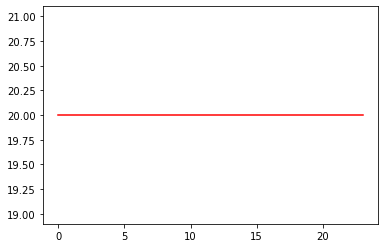

0.8165006229583321


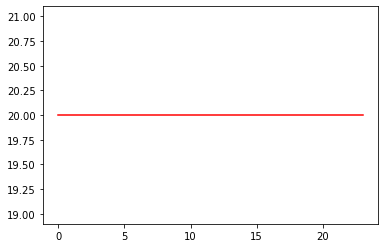

0.8185063097268795


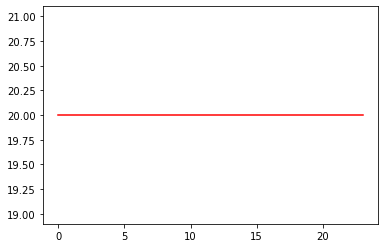

0.8112577948630668


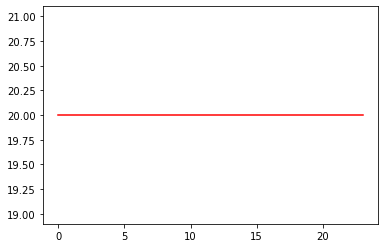

0.8551760191858228


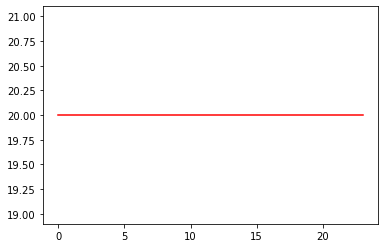

0.8399787654033648


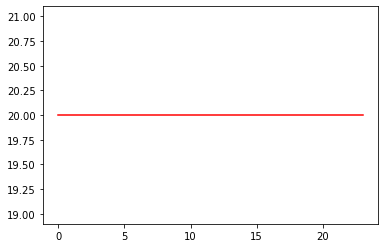

0.845275815597487


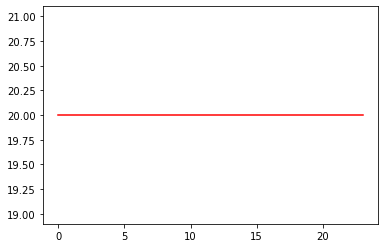

0.8255506790048828


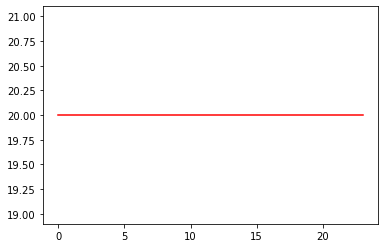

0.8092330094738771


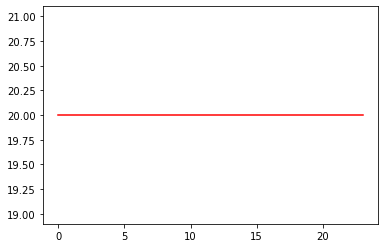

0.8034575222502003


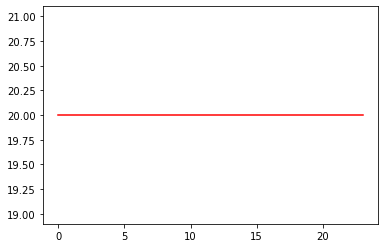

0.8020948269285713


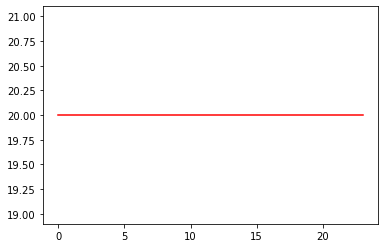

0.8098385453870811


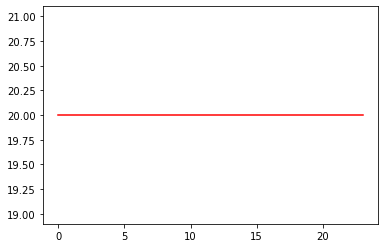

0.8143523737302212


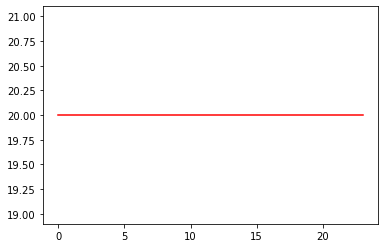

0.8162107795312176


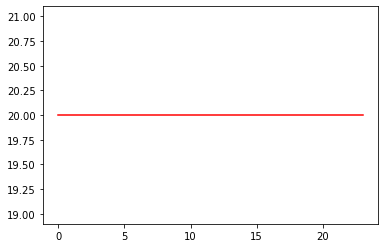

0.8025441903075468


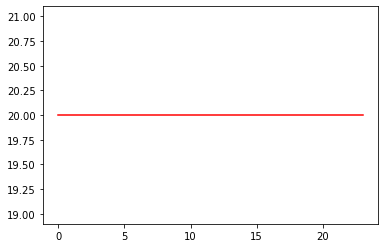

0.813999156046323


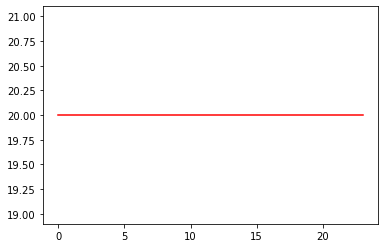

0.828612159403181


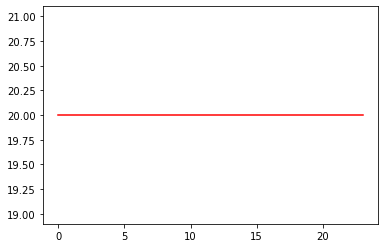

0.8292544567435851


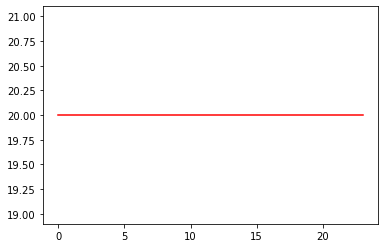

0.820861523558938


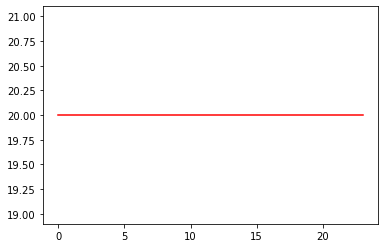

0.8044429930115751


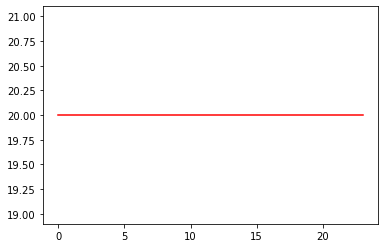

0.7962661759106823


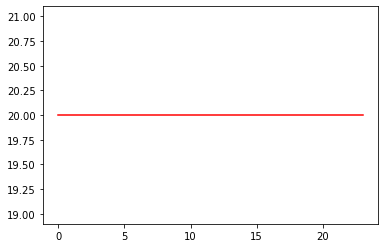

0.7938334876814424


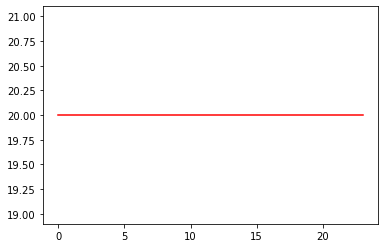

0.8009263575779916


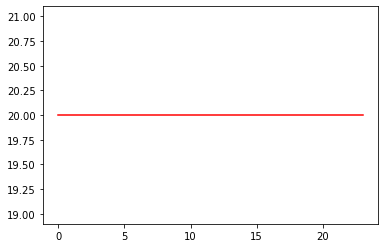

0.8110985369507521


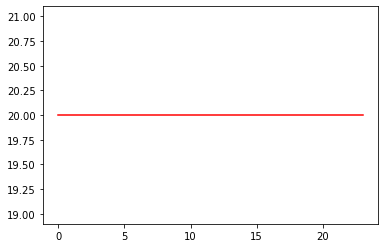

0.8143572731408351


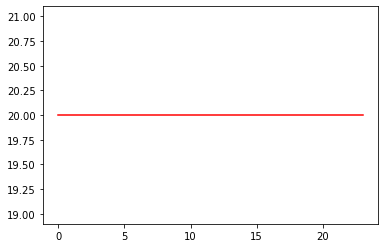

0.8084129201106449


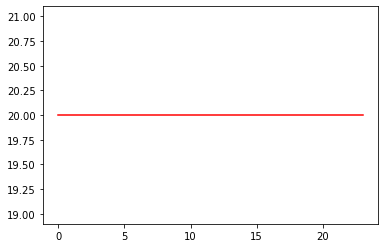

0.8184696038423807


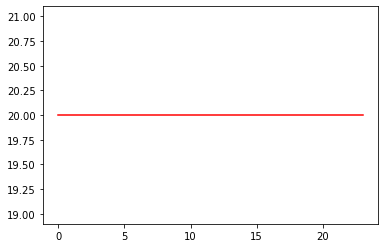

0.82506167731515


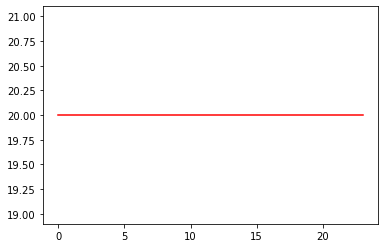

0.8261174154561994


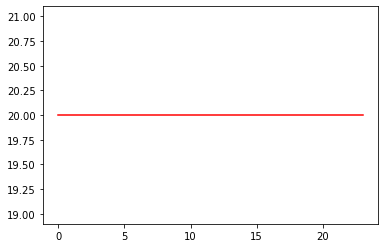

0.8209586007994937


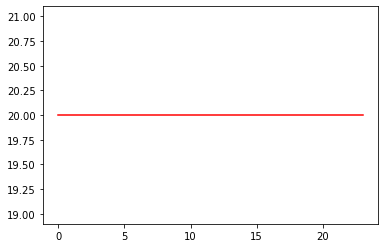

0.799458910453425


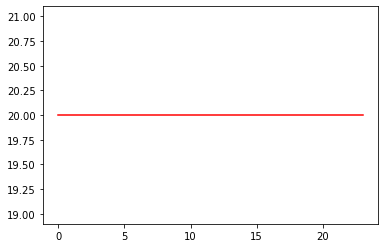

0.7900714945160905


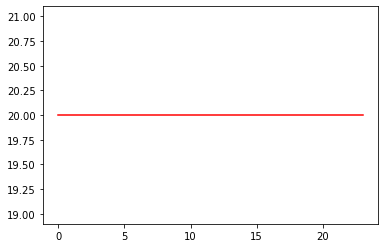

0.7895874134885816


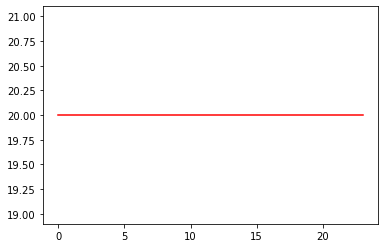

0.8019671716234616


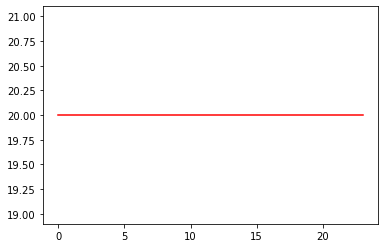

0.8068985795151403


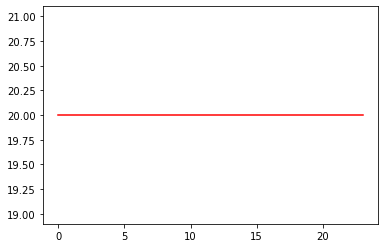

0.810129062669468


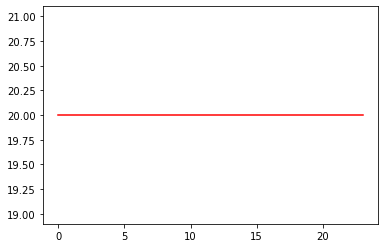

0.8093372211221058


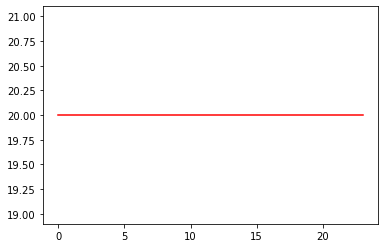

0.8138799414034734


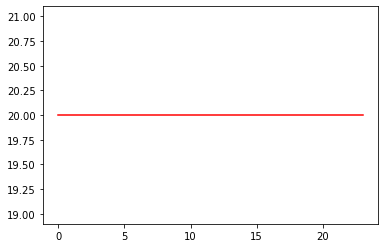

0.8200224626763504


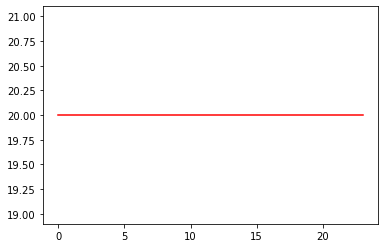

0.821601592370585


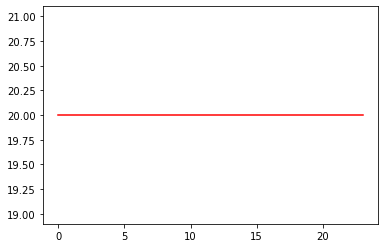

0.8217834344800712


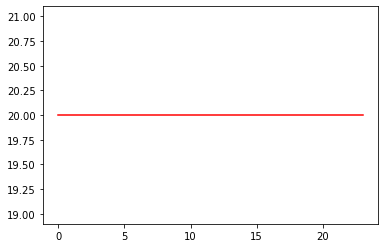

0.7945028840141142


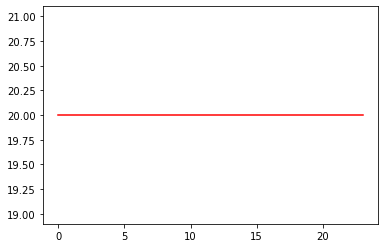

0.7859428714585779


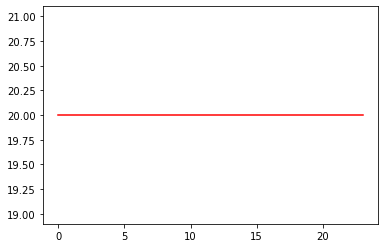

0.7821597132294384


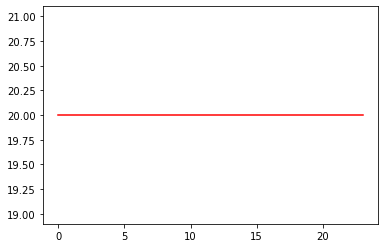

0.8193632095205983


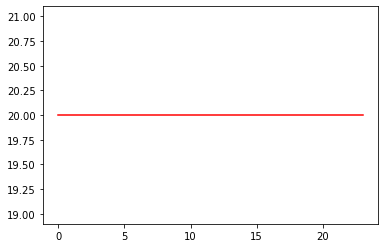

0.8251304158612937


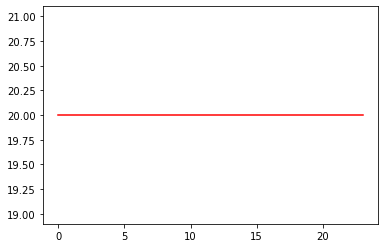

0.8286457615490702


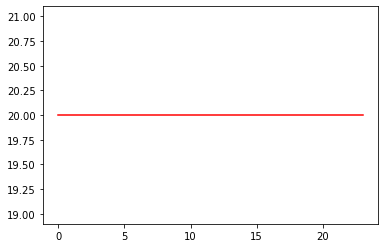

0.8287212195668647


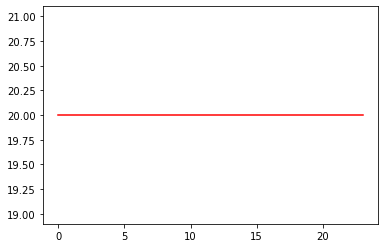

0.8245637847681231


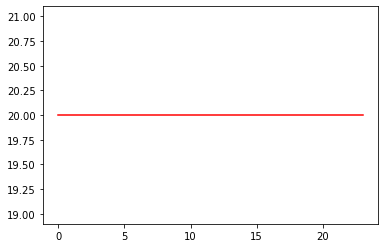

0.8333849766526702


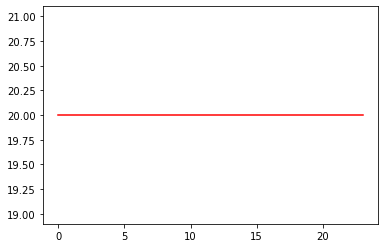

0.8363205270038623


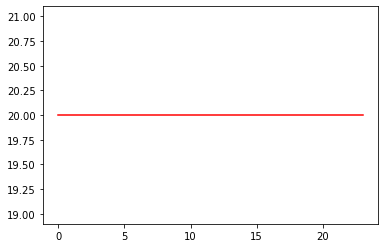

0.8438777621130022


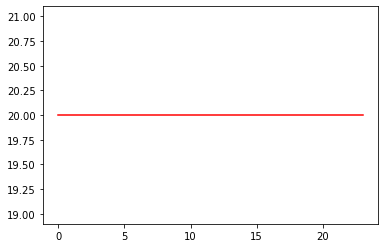

0.8155861066117582


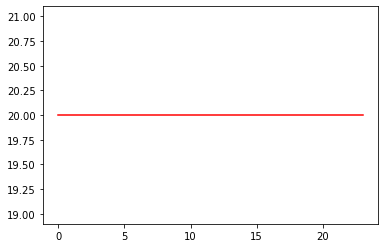

0.8061694130384325


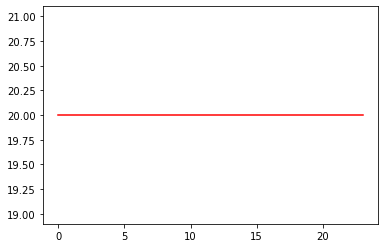

0.809050482049998


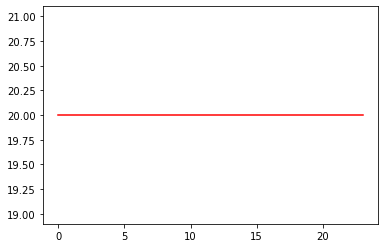

0.7689512543386766


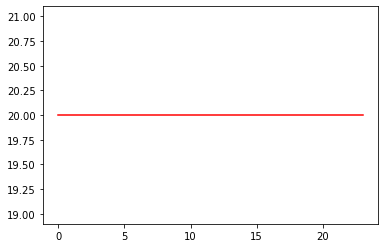

0.7833863663364392


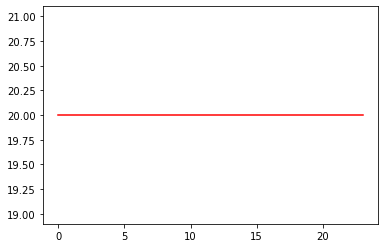

0.8166914592233646


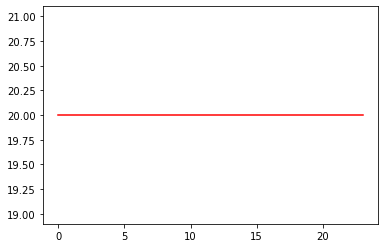

0.8120127163159151


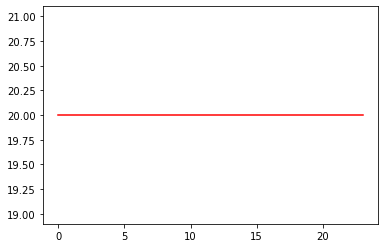

0.769630128938128


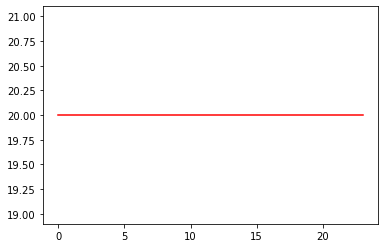

0.7808164523439851


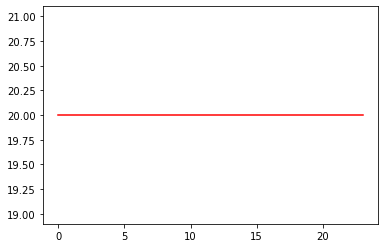

0.8149746914216279


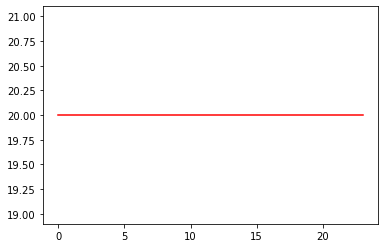

0.8163320947295173


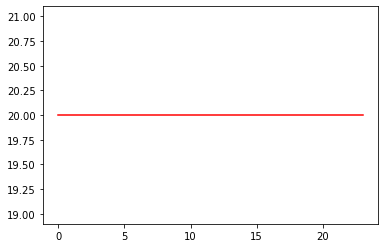

0.7738711218551341


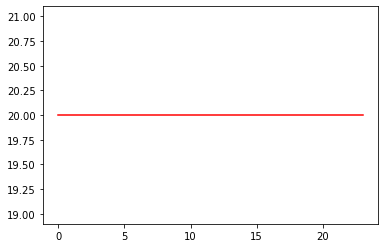

0.782883087832216


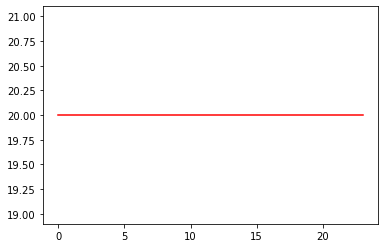

0.8132640187518714


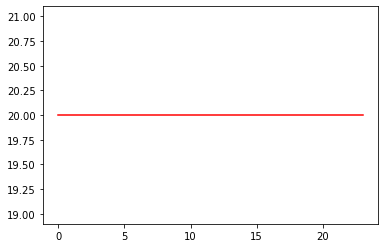

0.8215775135267792


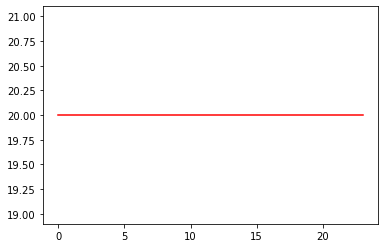

0.7764390074627354


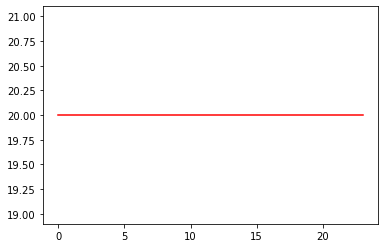

0.7837914117355725


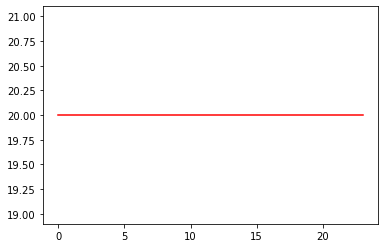

0.8094641815301056


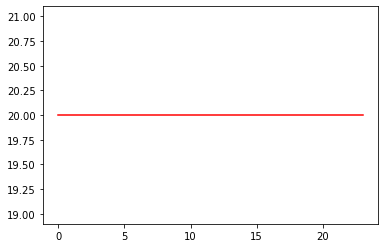

0.8199200924058903


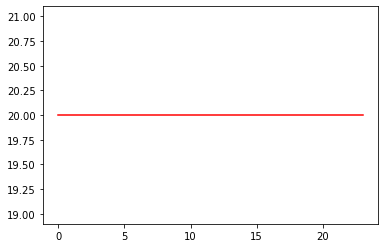

0.7980672005712564


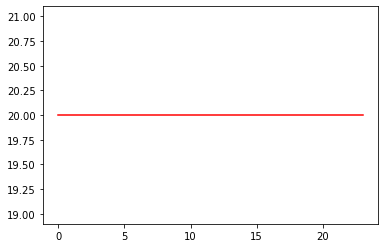

0.8006635799128625


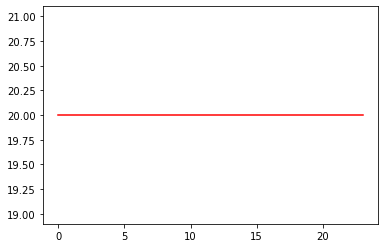

0.8259739747794741


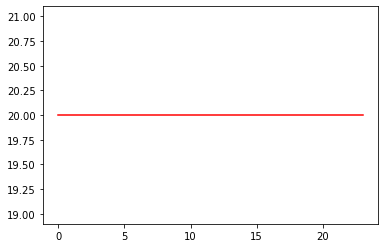

0.8307230136957828


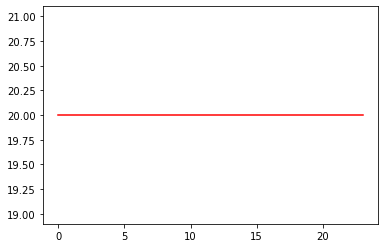

0.7877381582698686


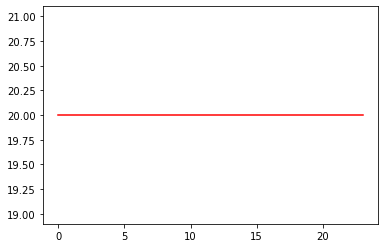

0.7765831447552676


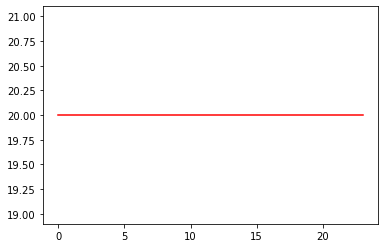

0.7985033604799203


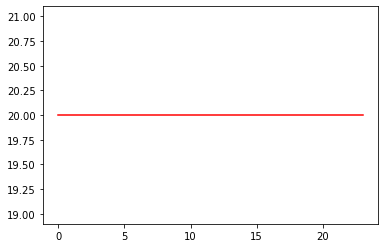

0.8020038447471836


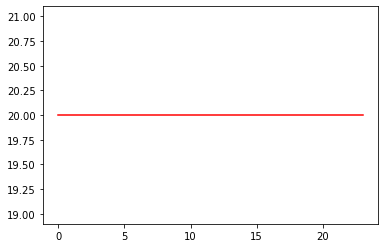

0.7855453290078954


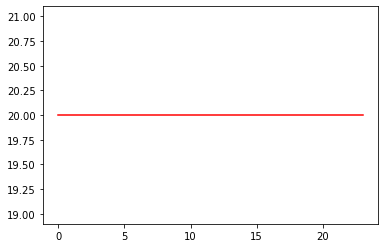

0.7709892619401157


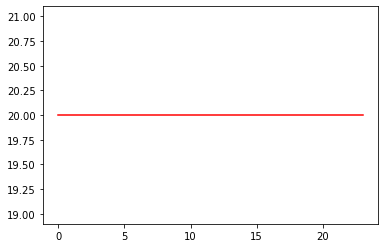

0.790704073723779


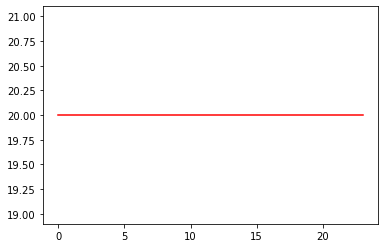

0.7955077852752015


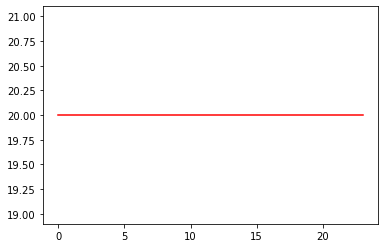

0.7892365336375536


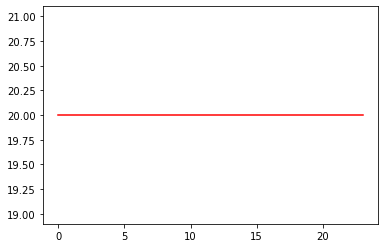

0.7698880325917756


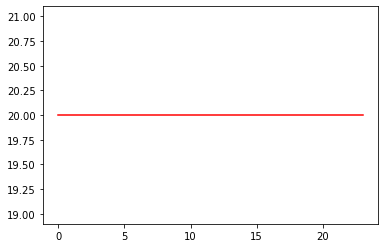

0.7850760034267988


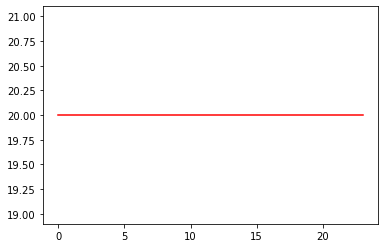

0.7929736181692606


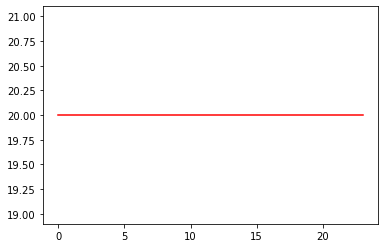

0.7917433224705617


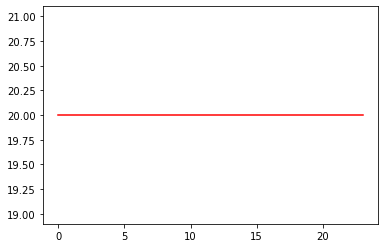

0.7709048143964886


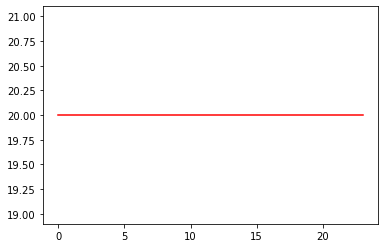

0.7802342704953276


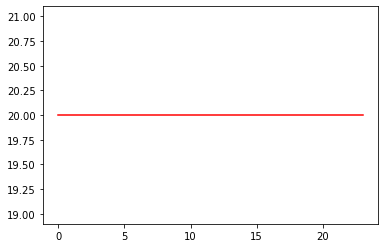

0.7897534499845733


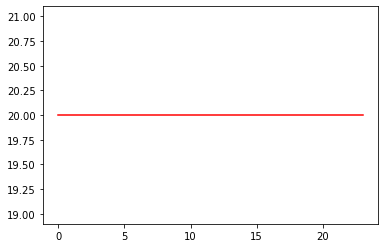

0.8072854787859396


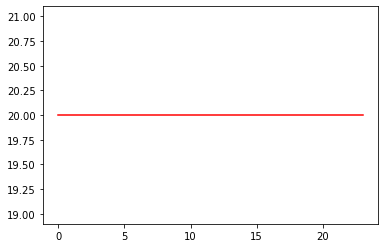

0.7914011271925598


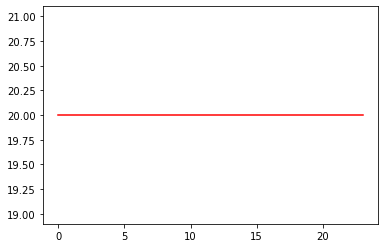

0.8026408588988847


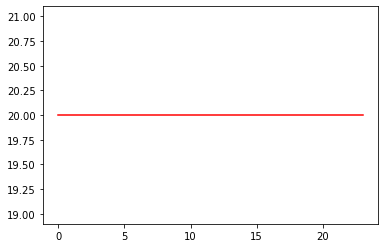

0.8215339483401009


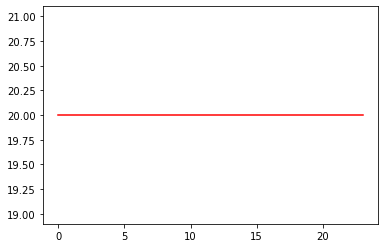

0.8209995469700524


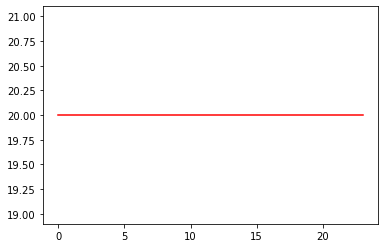

In [13]:
for i in df1.columns:
    if (i == 'DateTime' or i == 'Outdoor_Temperature' or i == 'Hour' or i == 'month' or i == 'Day' or i == 'Minute'):
        i
    else:
        forecast_DH = np.array([])
        X = df1[['Outdoor_Temperature','Hour','month','Day']]
        y = df1[i].round(2)
        model = LinearRegression().fit(X, y)
        print(model.score(X,y))
        for i in range(len(weatherforecast)):
            if ((weatherforecast.iloc[i,0] > 15) or (weatherforecast.iloc[i,3] >= 0 and 
                                                         weatherforecast.iloc[i,3] < 6) ):
                forecast_DH = np.append(forecast_DH,20).round(2)
            else:
                x =  pd.DataFrame((weatherforecast.iloc[i,0],weatherforecast.iloc[i,1],
                           weatherforecast.iloc[i,2],weatherforecast.iloc[i,3]))
                forecast_DH = np.append(forecast_DH,model.predict(x.T))
        plt.plot(weatherforecast.Hour,forecast_DH,'r')
        plt.show()

In [14]:
d = {'Temp': [22, 21,20,19,18,17,17,18,21,24,27,29,31,33,34,34,35,35,34,32,31,30,28,27], 
     'Hour': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], 
     'month': [8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8], 
     'Day':[7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7]}
df3 = pd.DataFrame(data=d)

In [15]:
d = {'Temp': [-27.2,
              -27.2,
              -22.8,
              -15.4,
              -9.4,
              -9.4,
              -5.6,
              -5.6,
              -5.6,
              -2.5,
              -4.5,
              -6.7,
              -5.6,
              -2.5,
              -4.5,
              -6.7,
              -4.5,
              -6.7,
              -5.6,
              -5.6,
              -5.6,
              -5.6,
              -2.5,
             -2.5], 
     'Hour': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], 
     'month': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
     'Day':[8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8]}
df4 = pd.DataFrame(data=d)

0.8209995469700524


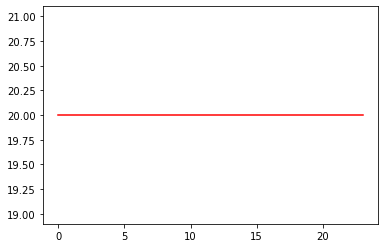

In [16]:
forecast_DH = np.array([])
X = df1[['Outdoor_Temperature','Hour','month','Day']]
y = df1.DH_Heating_Rate.round(2)
model = LinearRegression().fit(X, y)
print(model.score(X,y))
for i in range(len(df3)):
    if ((df3.iloc[i,0] > 15) or (df3.iloc[i,3] >= 0 and df3.iloc[i,3] < 6) or (df3.iloc[i,3] == 23)):
        forecast_DH = np.append(forecast_DH,20).round(2)
    else:
        x =  pd.DataFrame((df3.iloc[i,0],df3.iloc[i,1],
                           df3.iloc[i,2],df3.iloc[i,3]))
        forecast_DH = np.append(forecast_DH,model.predict(x.T))
plt.plot(df3.Hour,forecast_DH,'r')
plt.show()

In [17]:
forecast_DH1 = np.array([])
for i in range(len(df4)):
    if ((df4.iloc[i,0] > 15) or (df4.iloc[i,1] >= 0 and df4.iloc[i,1] < 6) or (df4.iloc[i,1] == 23)):
        forecast_DH1 = np.append(forecast_DH1,30).round(2)
    else:
        x =  pd.DataFrame((df4.iloc[i,0],df4.iloc[i,1],
                           df4.iloc[i,2],df4.iloc[i,3]))
        forecast_DH1 = np.append(forecast_DH1,model.predict(x.T))
forecast_DH1

array([ 30.  ,  30.  ,  30.  ,  30.  ,  30.  ,  30.  , 326.2 , 325.91,
       325.62, 285.81, 311.01, 338.76, 324.44, 284.64, 309.83, 337.58,
       309.25, 336.99, 322.68, 322.38, 322.09, 321.8 , 281.99,  30.  ])

In [18]:
df5 = pd.DataFrame(columns=['Temp','month','Day','Hour'])
for i in range(24):
    df5 = df5.append({'Temp':np.random.randint(0,15),'Hour': i,'month': 20,'Day': 12}, 
                                             ignore_index=True)

In [34]:
d = {'Temp': [0,
              0,
              0,
              0,
              0,
              15,
              15,
              15,
              10,
              10,
              10,
              15,
              15,
              15,
              15,
              15,
              6,
              5,
              5,
              12,
              12,
              14,
              14,
             0], 
     'Hour': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], 
     'month': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
     'Day':[8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8]}
df5 = pd.DataFrame(data=d)

In [35]:
forecast_DH2 = np.array([])
for i in range(len(df4)):
    if ((df5.iloc[i,0] > 15) or (df5.iloc[i,1] >= 0 and df5.iloc[i,1] < 6) or (df5.iloc[i,1] == 23)):
        forecast_DH2 = np.append(forecast_DH2,40).round(2)
    else:
        x =  pd.DataFrame((df5.iloc[i,0],df5.iloc[i,1],
                           df5.iloc[i,2],df5.iloc[i,3]))
        forecast_DH2 = np.append(forecast_DH2,model.predict(x.T))

In [36]:
forecast_DH3 = np.array([])
for i in range(len(weatherforecast)):
            if ((weatherforecast.iloc[i,0] > 16) or (weatherforecast.iloc[i,3] >= 0 and 
                                                     weatherforecast.iloc[i,3] < 6
                                                    or (weatherforecast.iloc[i,3] == 23)) 
                or (weatherforecast.iloc[i,3] == 23)):
                forecast_DH3 = np.append(forecast_DH3,20).round(2)
            else:
                x =  pd.DataFrame((weatherforecast.iloc[i,0],weatherforecast.iloc[i,1],
                           weatherforecast.iloc[i,2],weatherforecast.iloc[i,3]))
                forecast_DH3 = np.append(forecast_DH3,model.predict(x.T))

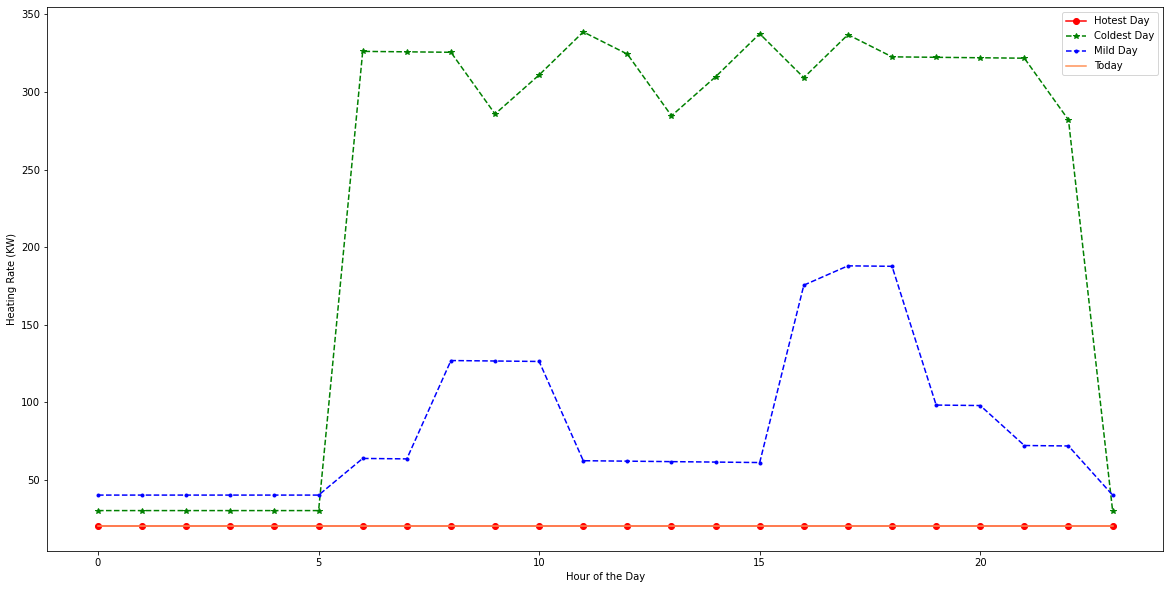

In [37]:
plt.figure(
    figsize=(20, 10))
plt.plot(df3.Hour,forecast_DH,'r',label='Hotest Day', marker='o')
plt.plot(df4.Hour,forecast_DH1,'g',label='Coldest Day',linestyle='dashed', marker='*')
plt.plot(df5.Hour,forecast_DH2,'b',label='Mild Day',linestyle='dashed', marker='.')
plt.plot(df5.Hour,forecast_DH3,color = '#ff9157',label='Today')
plt.xlabel('Hour of the Day')
plt.ylabel('Heating Rate (KW)')
plt.legend()
plt.show()

In [57]:
df6 = pd.DataFrame(columns=['Temp','month','Day','Hour'])
for i in range(24):
    df6 = df6.append({'Temp':np.random.randint(-4.5,-1.5),'Hour': i,'month': 20,'Day': 12}, 
                                             ignore_index=True)
forecast_DH6 = np.array([])
for i in range(len(df6)):
    if ((df5.iloc[i,0] > 15) or (df6.iloc[i,3] >= 0 and df6.iloc[i,3] < 6) or (df6.iloc[i,3] == 23)):
        forecast_DH6 = np.append(forecast_DH6,40).round(2)
    else:
        x =  pd.DataFrame((df6.iloc[i,0],df6.iloc[i,1],
                           df6.iloc[i,2],df6.iloc[i,3]))
        forecast_DH6 = np.append(forecast_DH6,model.predict(x.T))

In [58]:
df7 = pd.DataFrame(columns=['Temp','month','Day','Hour'])
for i in range(24):
    df7 = df7.append({'Temp':np.random.randint(-1.5,1.5),'Hour': i,'month': 20,'Day': 12}, 
                                             ignore_index=True)
forecast_DH7 = np.array([])
for i in range(len(df7)):
    if ((df7.iloc[i,0] > 15) or (df7.iloc[i,3] >= 0 and df7.iloc[i,3] < 6) or (df7.iloc[i,3] == 23)):
        forecast_DH7 = np.append(forecast_DH7,40).round(2)
    else:
        x =  pd.DataFrame((df7.iloc[i,0],df7.iloc[i,1],
                           df7.iloc[i,2],df7.iloc[i,3]))
        forecast_DH7 = np.append(forecast_DH7,model.predict(x.T))

In [50]:
df8 = pd.DataFrame(columns=['Temp','month','Day','Hour'])
for i in range(24):
    df8 = df8.append({'Temp':np.random.randint(1.5,4.5),'Hour': i,'month': 20,'Day': 12}, 
                                             ignore_index=True)
forecast_DH8 = np.array([])
for i in range(len(df8)):
    if ((df8.iloc[i,0] > 15) or (df8.iloc[i,3] >= 0 and df8.iloc[i,3] < 6) or (df8.iloc[i,3] == 23)):
        forecast_DH8 = np.append(forecast_DH8,40).round(2)
    else:
        x =  pd.DataFrame((df8.iloc[i,0],df8.iloc[i,1],
                           df8.iloc[i,2],df8.iloc[i,3]))
        forecast_DH8 = np.append(forecast_DH8,model.predict(x.T))

In [52]:
df9 = pd.DataFrame(columns=['Temp','month','Day','Hour'])
for i in range(24):
    df9 = df9.append({'Temp':np.random.randint(4.5,7.5),'Hour': i,'month': 20,'Day': 12}, 
                                             ignore_index=True)
forecast_DH9 = np.array([])
for i in range(len(df9)):
    if ((df9.iloc[i,0] > 15) or (df9.iloc[i,3] >= 0 and df9.iloc[i,3] < 6) or (df9.iloc[i,3] == 23)):
        forecast_DH9 = np.append(forecast_DH9,40).round(2)
    else:
        x =  pd.DataFrame((df9.iloc[i,0],df9.iloc[i,1],
                           df9.iloc[i,2],df9.iloc[i,3]))
        forecast_DH9 = np.append(forecast_DH9,model.predict(x.T))

In [53]:
df10 = pd.DataFrame(columns=['Temp','month','Day','Hour'])
for i in range(24):
    df10 = df10.append({'Temp':np.random.randint(7.5,10.5),'Hour': i,'month': 20,'Day': 12}, 
                                             ignore_index=True)
forecast_DH10 = np.array([])
for i in range(len(df10)):
    if ((df10.iloc[i,0] > 15) or (df10.iloc[i,3] >= 0 and df10.iloc[i,3] < 6) or (df10.iloc[i,3] == 23)):
        forecast_DH10 = np.append(forecast_DH10,40).round(2)
    else:
        x =  pd.DataFrame((df10.iloc[i,0],df10.iloc[i,1],
                           df10.iloc[i,2],df10.iloc[i,3]))
        forecast_DH10 = np.append(forecast_DH10,model.predict(x.T))

In [54]:
df11 = pd.DataFrame(columns=['Temp','month','Day','Hour'])
for i in range(24):
    df11 = df11.append({'Temp':np.random.randint(10.5,13.5),'Hour': i,'month': 20,'Day': 12}, 
                                             ignore_index=True)
forecast_DH11 = np.array([])
for i in range(len(df11)):
    if ((df11.iloc[i,0] > 15) or (df11.iloc[i,3] >= 0 and df11.iloc[i,3] < 6) or (df11.iloc[i,3] == 23)):
        forecast_DH11 = np.append(forecast_DH11,40).round(2)
    else:
        x =  pd.DataFrame((df11.iloc[i,0],df11.iloc[i,1],
                           df11.iloc[i,2],df11.iloc[i,3]))
        forecast_DH11 = np.append(forecast_DH11,model.predict(x.T))

In [55]:
df12 = pd.DataFrame(columns=['Temp','month','Day','Hour'])
for i in range(24):
    df12 = df12.append({'Temp':np.random.randint(13.5,16.5),'Hour': i,'month': 20,'Day': 12}, 
                                             ignore_index=True)
forecast_DH12 = np.array([])
for i in range(len(df12)):
    if ((df12.iloc[i,0] > 15) or (df12.iloc[i,3] >= 0 and df12.iloc[i,3] < 6) or (df12.iloc[i,3] == 23)):
        forecast_DH12 = np.append(forecast_DH12,40).round(2)
    else:
        x =  pd.DataFrame((df12.iloc[i,0],df12.iloc[i,1],
                           df12.iloc[i,2],df12.iloc[i,3]))
        forecast_DH12 = np.append(forecast_DH12,model.predict(x.T))

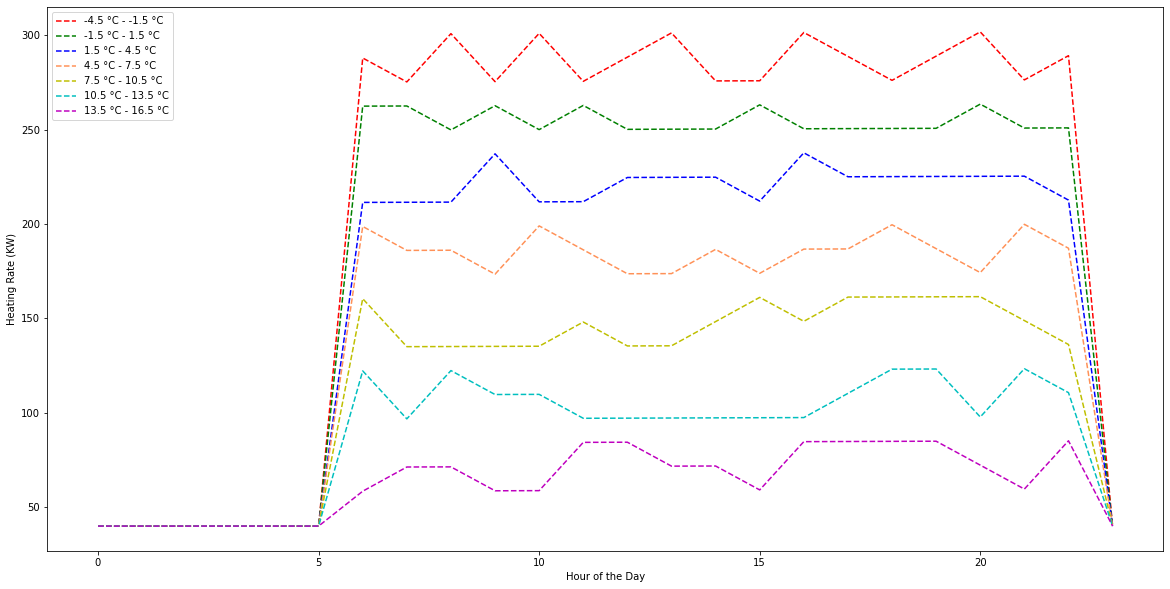

In [60]:
plt.figure(
    figsize=(20, 10))
plt.plot(df6.Hour,forecast_DH6,'r',label='-4.5 °C - -1.5 °C',linestyle='dashed')
plt.plot(df7.Hour,forecast_DH7,'g',label='-1.5 °C - 1.5 °C',linestyle='dashed')
plt.plot(df8.Hour,forecast_DH8,'b',label='1.5 °C - 4.5 °C',linestyle='dashed')
plt.plot(df9.Hour,forecast_DH9,color = '#ff9157',label='4.5 °C - 7.5 °C',linestyle='dashed')
plt.plot(df10.Hour,forecast_DH10,color = 'y',label='7.5 °C - 10.5 °C',linestyle='dashed')
plt.plot(df11.Hour,forecast_DH11,color = 'c',label='10.5 °C - 13.5 °C',linestyle='dashed')
plt.plot(df12.Hour,forecast_DH12,color = 'm',label='13.5 °C - 16.5 °C',linestyle='dashed')
plt.xlabel('Hour of the Day')
plt.ylabel('Heating Rate (KW)')
plt.legend()
plt.show()